In [31]:
!pip install seaborn
!pip install pingouin
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import ppscore as pps
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
from datetime import timedelta
from datetime import datetime
from sklearn.impute import SimpleImputer
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import sklearn
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import SmartCorrelatedSelection
import math
import joblib
import pickle
import ipywidgets
from IPython.display import display



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [32]:
excel_file_path = '../budgetusd.xlsx'
sheet_name = "Rooms Revenue"
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
# Load the Excel file into a pandas DataFrame


In [33]:
import pandas as pd
import math

# This function will remove decimal points
def round_up_numeric(value):
    if pd.notnull(value) and isinstance(value, (int, float)):
        return math.ceil(value * 100) / 100
    return value

# Load your DataFrame (assuming you've already loaded it)
# df = pd.read_excel('budgetusd.xlsx', sheet_name='Rooms Revenue', engine='openpyxl')

# Apply the 'round_up_numeric' function to all columns
df = df.applymap(round_up_numeric)

# Define replacements for multiple columns
column_replacements = {
    'Local Rainy Season': {"No": 0, "Medium": 1, "Yes": 2},
    'Seasonality': {"Low": 0, "Medium": 1, "High": 2}
}

# Map values in the specified columns
for col, replacements in column_replacements.items():
    df[col] = df[col].replace(replacements)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now, you can run this entire cell to execute all the operations.


In [34]:
df

,Percentage Rooms Occ %,Holidays Local,Seasonality,Holidays North,Local Rainy Season,International Flights,Marketing,Average Room Rate,Number of Rooms,Rooms Revenue
Date,,,,,,,,,,
2021-10-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0,0.00
2021-11-01,0.00,0.0,0,0.0,0,1.0,10.00,70.0,9.0,0.00
2021-12-01,0.00,0.0,0,0.0,0,1.0,10.00,70.0,9.0,0.00
2022-01-01,0.61,3.0,2,7.0,0,1.0,62.12,75.0,9.0,13136.89
2022-02-01,0.62,1.0,2,0.0,0,1.0,62.12,75.0,9.0,11430.53
2022-03-01,0.39,0.0,2,0.0,0,1.0,99.31,75.0,9.0,9742.62
2022-04-01,0.70,5.0,2,0.0,0,1.0,246.06,75.0,9.0,15043.81
2022-05-01,0.47,1.0,0,0.0,1,1.0,144.93,75.0,9.0,8546.17
2022-06-01,0.33,0.0,0,0.0,1,1.0,118.46,75.0,9.0,7171.42


In [35]:
df.drop(columns=['Rooms Revenue'], inplace=True)


In [36]:
df

,Percentage Rooms Occ %,Holidays Local,Seasonality,Holidays North,Local Rainy Season,International Flights,Marketing,Average Room Rate,Number of Rooms
Date,,,,,,,,,
2021-10-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0
2021-11-01,0.00,0.0,0,0.0,0,1.0,10.00,70.0,9.0
2021-12-01,0.00,0.0,0,0.0,0,1.0,10.00,70.0,9.0
2022-01-01,0.61,3.0,2,7.0,0,1.0,62.12,75.0,9.0
2022-02-01,0.62,1.0,2,0.0,0,1.0,62.12,75.0,9.0
2022-03-01,0.39,0.0,2,0.0,0,1.0,99.31,75.0,9.0
2022-04-01,0.70,5.0,2,0.0,0,1.0,246.06,75.0,9.0
2022-05-01,0.47,1.0,0,0.0,1,1.0,144.93,75.0,9.0
2022-06-01,0.33,0.0,0,0.0,1,1.0,118.46,75.0,9.0


In [37]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor



def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection",  SelectFromModel(model)),

        ("model", model),

    ])

    return pipeline_base


In [38]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Percentage Rooms Occ %'], axis=1), 
    df['Percentage Rooms Occ %'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)


* Train set: (40, 8) (40,) 
* Test set: (11, 8) (11,)


In [40]:
models_quick_search = {
    'LinearRegression': LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    'LinearRegression': {},
    "DecisionTreeRegressor": {},
    "RandomForestRegressor": {},
    "ExtraTreesRegressor": {},
    "AdaBoostRegressor": {},
    "GradientBoostingRegressor": {},
    "XGBRegressor": {},
}

In [41]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [42]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
3,ExtraTreesRegressor,0.407408,0.686727,0.88742,0.164386
1,DecisionTreeRegressor,0.407408,0.650402,0.873835,0.157336
5,GradientBoostingRegressor,0.400252,0.611185,0.855603,0.180006
2,RandomForestRegressor,0.281216,0.592227,0.842986,0.204294
6,XGBRegressor,-0.206056,0.491386,0.88795,0.367664
4,AdaBoostRegressor,0.071873,0.444371,0.871366,0.299942
0,LinearRegression,-0.823826,0.28227,0.849569,0.607484


In [43]:
models_search = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 50, 150],
        'model__max_depth': [None, 3, 15],
        'model__min_samples_split': [2, 50],
        'model__min_samples_leaf': [1, 50],
    }
}


In [44]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [45]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators
25,ExtraTreesRegressor,0.407408,0.687243,0.886248,0.163851,15,1,2,50
1,ExtraTreesRegressor,0.407408,0.687243,0.886248,0.163851,None,1,2,50
0,ExtraTreesRegressor,0.407408,0.686727,0.88742,0.164386,None,1,2,100
24,ExtraTreesRegressor,0.407408,0.686727,0.88742,0.164386,15,1,2,100
2,ExtraTreesRegressor,0.407408,0.683698,0.888224,0.16458,None,1,2,150
26,ExtraTreesRegressor,0.407408,0.683698,0.888224,0.16458,15,1,2,150
12,ExtraTreesRegressor,0.144484,0.512687,0.89577,0.312368,3,1,2,100
13,ExtraTreesRegressor,0.130341,0.506315,0.89547,0.32715,3,1,2,50
14,ExtraTreesRegressor,0.142661,0.493415,0.893419,0.32205,3,1,2,150
33,ExtraTreesRegressor,-0.481156,-0.156233,-0.019606,0.167945,15,50,50,100


In [46]:
best_model = grid_search_summary.iloc[0, 0]
best_model


'ExtraTreesRegressor'

In [47]:
grid_search_pipelines[best_model].best_params_


{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 50}

In [48]:
best_regressor_pipeline = grid_search_pipelines[best_model].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=0))),
                ('model',
                 ExtraTreesRegressor(n_estimators=50, random_state=0))])

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(3))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.954
Mean Absolute Error: 0.027
Mean Squared Error: 0.002
Root Mean Squared Error: 0.045


* Test Set
R2 Score: 0.89
Mean Absolute Error: 0.061
Mean Squared Error: 0.006
Root Mean Squared Error: 0.077




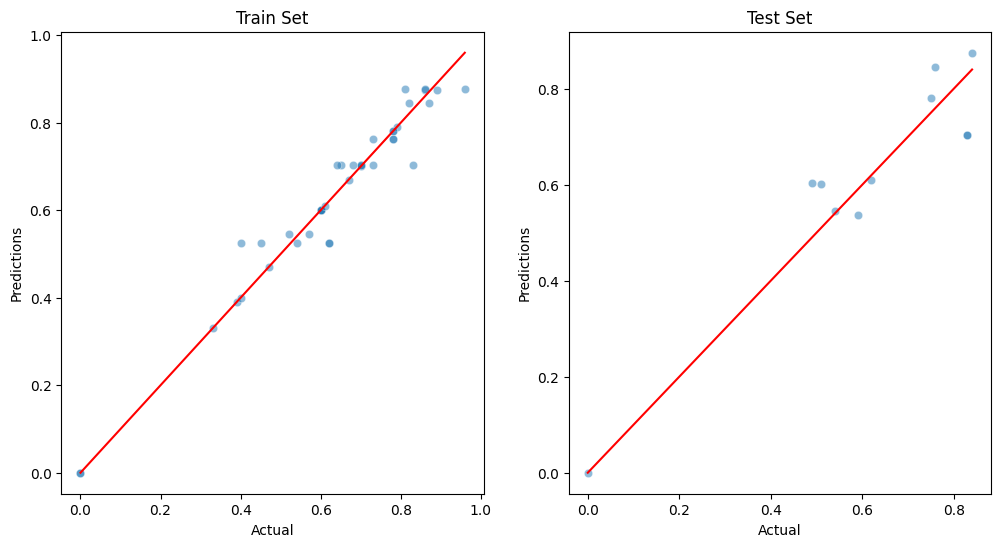

In [50]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

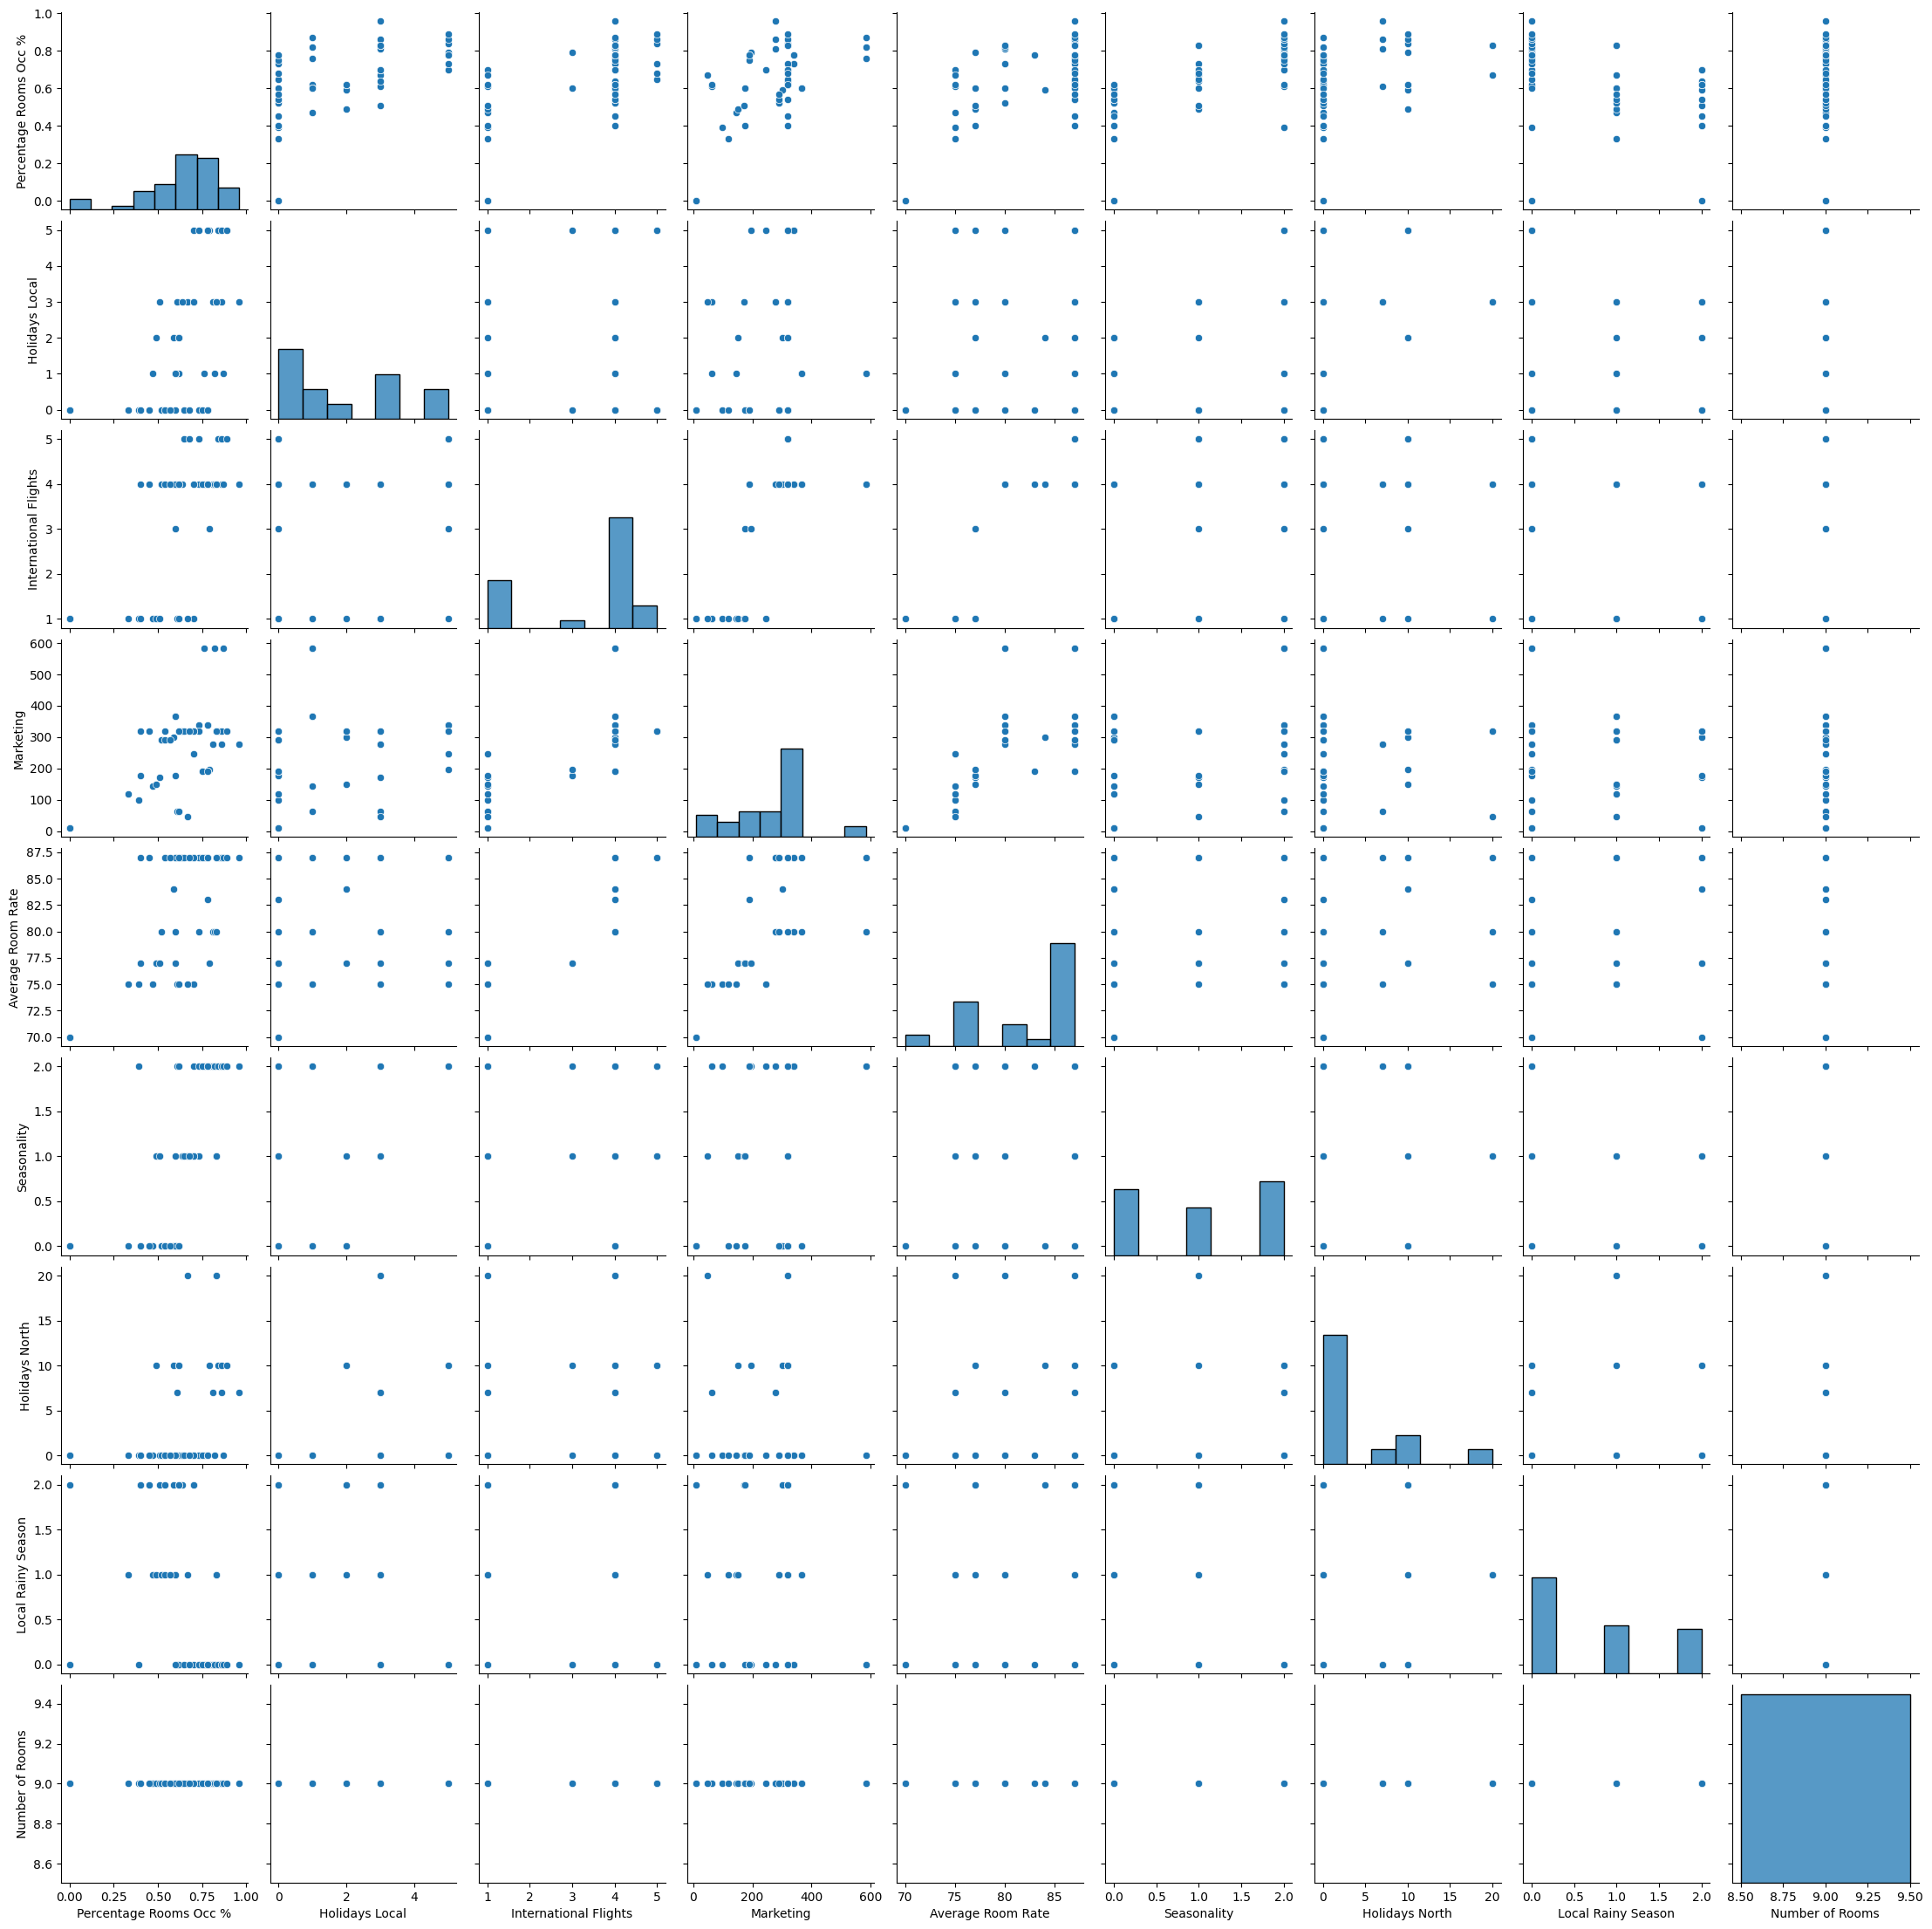

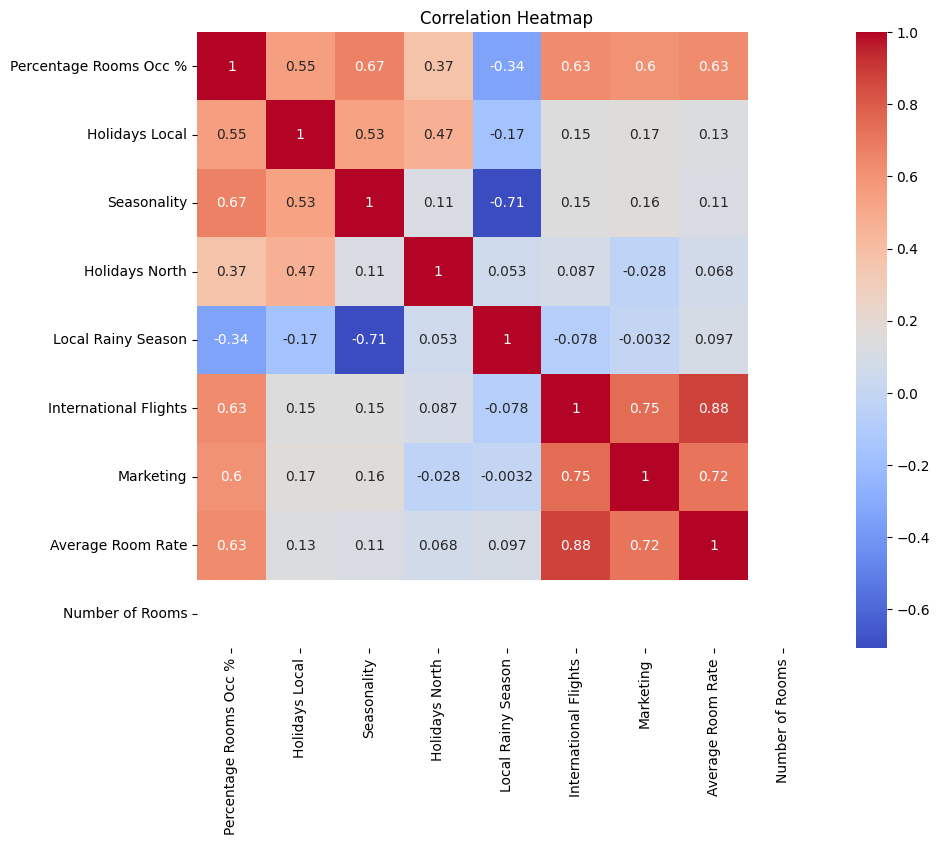

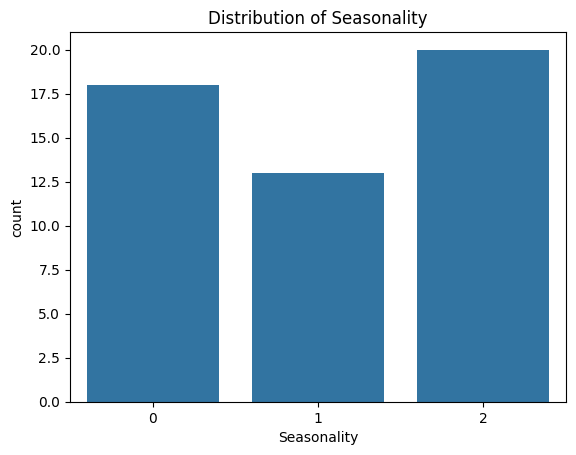

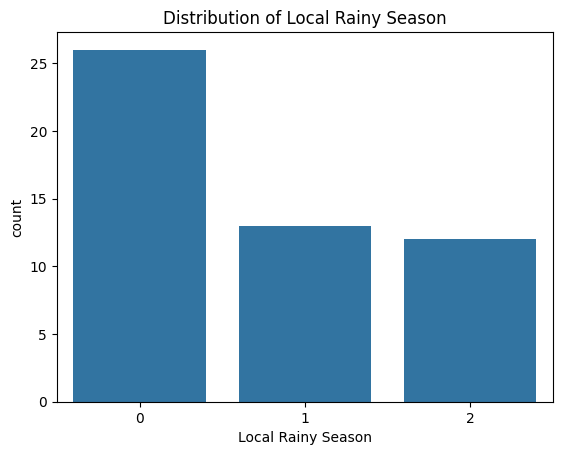

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for numerical variables 	
sns.pairplot(df, vars=['Percentage Rooms Occ %', 'Holidays Local', 'International Flights', 'Marketing', 'Average Room Rate', 
'Seasonality', 'Holidays North', 'Local Rainy Season', 'Number of Rooms'])
plt.show()

# Heatmap for numerical variable correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Bar plots for categorical variables
categorical_cols = ['Seasonality', 'Local Rainy Season']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


### Split training and test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['Percentage Rooms Occ %'], axis=1),
                                        df['Percentage Rooms Occ %'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (40, 8) (40,) 
* Test set: (11, 8) (11,)


In [53]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
])

    return pipeline
pipeline_random_forest_reg()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [54]:
pipeline = pipeline_random_forest_reg()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [55]:
def feature_importance_tree_based_models(model, columns):
    """ Gets the mode, and the columns used to train the model
        we use the model.feature_importanes_ and columns to make a DataFrame that shows 
        the importance of each feature and then we print the features name and its relative 
        importance order, followed by a barplot indicating the importance
        """ 
    # Create DataFrame to display feature importance
    df_feature_importance = pd.DataFrame(data={
        'Features': columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    best_features = df_feature_importance['Features'].to_list()

    # Print the most important features and plot the feature importance
    print(f"* These are the {len(best_features)} most important features in descending order. The model was trained on them:")
    print(df_feature_importance['Features'].to_list())

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 3 most important features in descending order. The model was trained on them:
['Marketing', 'Seasonality', 'Average Room Rate']


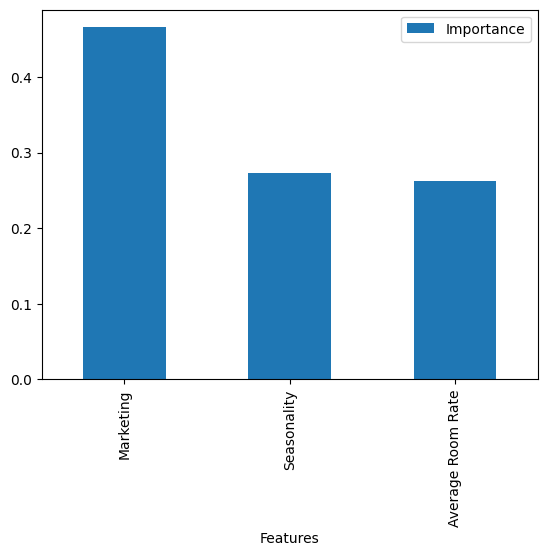

In [56]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns = X_train.columns[pipeline['feature_selection'].get_support()])

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")
    
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    
    plt.show()


Model Evaluation
* Train Set
R2 Score: 0.949
Mean Absolute Error: 0.038
Mean Squared Error: 0.002
Root Mean Squared Error: 0.047


* Test Set
R2 Score: 0.882
Mean Absolute Error: 0.065
Mean Squared Error: 0.007
Root Mean Squared Error: 0.081




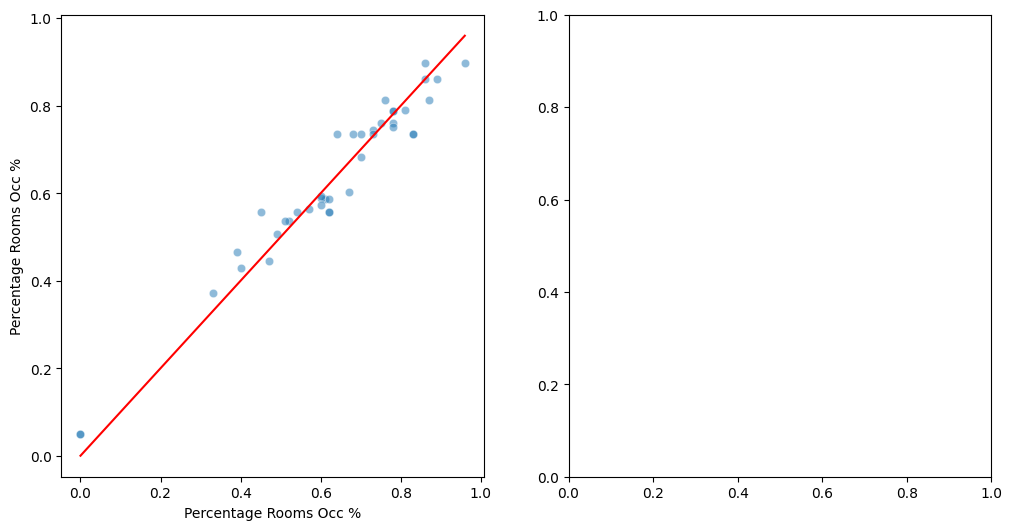

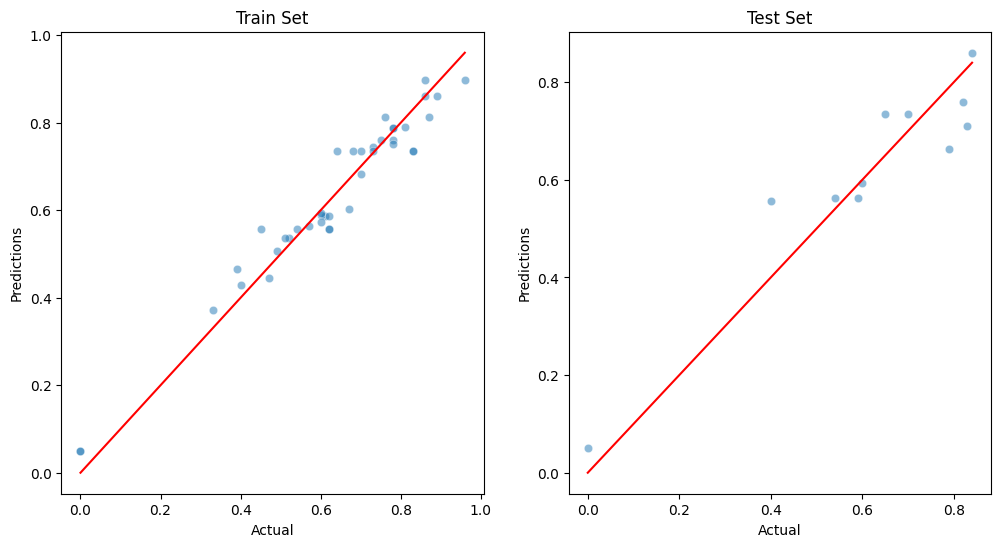

In [58]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

#### Relevant features

In [59]:
relevant_features = ['Marketing', 'Seasonality', 'Average Room Rate', 'Local Rainy Season', 'Holidays Local', 'Percentage Rooms Occ %'] 
df_relevant = df[relevant_features]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df_relevant.drop(['Percentage Rooms Occ %'], axis=1),
                                        df_relevant['Percentage Rooms Occ %'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (40, 5) (40,) 
* Test set: (11, 5) (11,)


In [61]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor


def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("model", ExtraTreesRegressor(random_state=101)),
])

    return pipeline
pipeline_random_forest_reg()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('model', ExtraTreesRegressor(random_state=101))])

In [62]:
pipeline = pipeline_random_forest_reg()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('model', ExtraTreesRegressor(random_state=101))])

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")
    
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    
    plt.show()


Model Evaluation
* Train Set
R2 Score: 0.989
Mean Absolute Error: 0.012
Mean Squared Error: 0.0
Root Mean Squared Error: 0.022


* Test Set
R2 Score: 0.929
Mean Absolute Error: 0.05
Mean Squared Error: 0.004
Root Mean Squared Error: 0.063




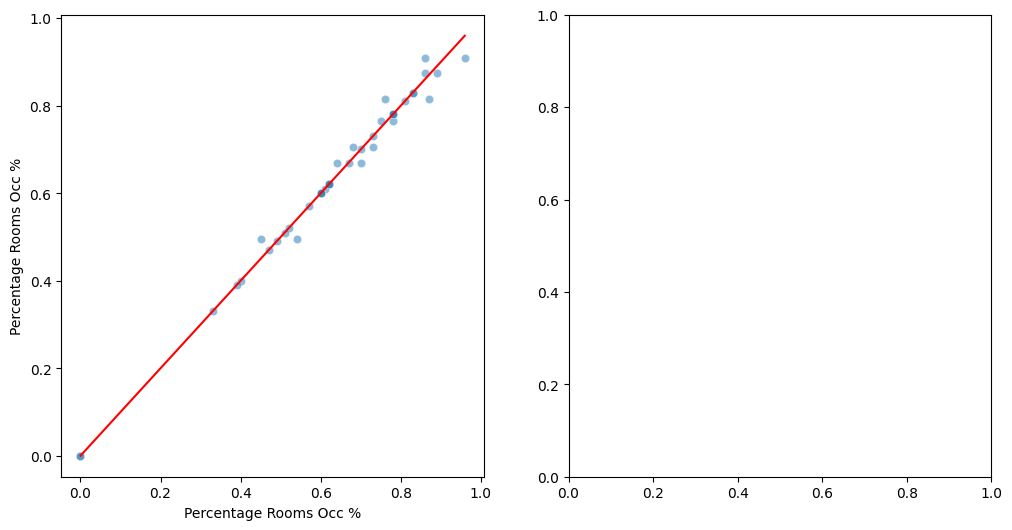

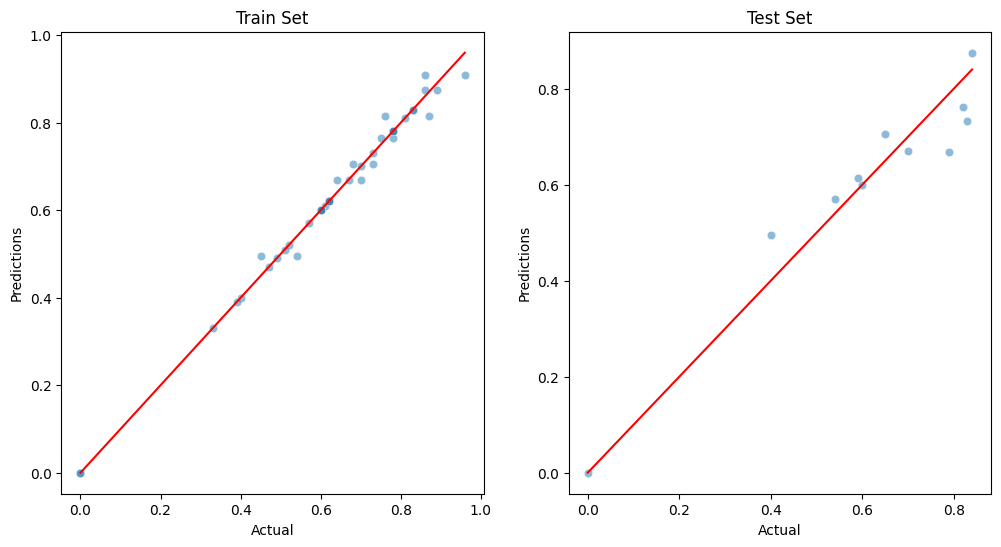

In [64]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

#### Save code

In [65]:
model = 'occupancy_model.pkl'
joblib.dump(pipeline, model)

['occupancy_model.pkl']

In [66]:
loaded_model = joblib.load('occupancy_model.pkl')


### Predictive test

In [67]:
# Create a new DataFrame with the features in the correct order
new_data = pd.DataFrame({
    'Marketing': [500], 
    'Seasonality': [1], 
    'Average Room Rate': [85],
    'Local Rainy Season':[0],
    'Holidays Local': [4]
})

# Use the model to make predictions
predicted_occupancy = loaded_model.predict(new_data)

# Print the predicted occupancy
print(f"Predicted Percentage Rooms Occupancy %: {predicted_occupancy[0]:.2f}%")

# Example predicted occupancy percentage
number_of_rooms = 9  # Example number of rooms
number_of_days = 30  # Example number of days for a monthly prediction
room_rate = 86  # Example room rate per day
room_revenue = (predicted_occupancy * number_of_rooms * number_of_days * room_rate)
print(f"Predicted Rooms Revenue: {room_revenue}$")



Predicted Percentage Rooms Occupancy %: 0.76%
Predicted Rooms Revenue: [17574.057]$


In [68]:
# Example predicted occupancy percentage
number_of_rooms = 9  # Example number of rooms
number_of_days = 30  # Example number of days for a monthly prediction
room_rate = 86  # Example room rate per day
room_revenue = (predicted_occupancy * number_of_rooms * number_of_days * room_rate)
room_revenue


array([17574.057])